# 读取数据集  
这里是直接联网读取，也可以通过下载文件，再读取

In [1]:
import pandas as pd

In [2]:
data_dir = 'https://mirror.coggle.club/dataset/coggle-competition/'
train_data = pd.read_csv(data_dir + 'intent-recognition-train.csv', sep='\t', header=None)
test_data = pd.read_csv(data_dir + 'intent-recognition-test.csv', sep='\t', header=None)

train_data[1].value_counts()

train_data[0].apply(len).describe()

count    12100.000000
mean        15.138678
std          4.872583
min          4.000000
25%         12.000000
50%         15.000000
75%         18.000000
max         54.000000
Name: 0, dtype: float64

## 中文分词

In [3]:
from wordcloud import WordCloud  
import matplotlib.pyplot as plt
import jieba

In [ ]:
!wget https://mirror.coggle.club/STHeiti-Light.ttc

['随便', '播放', '一首', '专辑', '阁楼', '佛里', '歌单', '曲', '循环', '一首', '催眠', '歌', '播放', '钢琴曲', '命运', '交响曲', '我要', '听', '治愈', '日语', '歌曲', '单曲', '循环', '赵雷', '时光', '这首', '流行', '播放', '一首', '适合', '开心', '听', '歌曲', '想', '听', '顽童', '辣台', '妹能', '播放', '2011', '浪漫', '歌来', '一首', '放', '一个', '德语', '歌曲', '播放', '日语', '歌泪', '物语', '请', '一首', '吴亦凡', '英文歌', 'July', '。', '循环', '播放', '张哲瀚', '环绕', '请', '播放', '带', '戏曲', '唱腔', '专辑', '赤伶', '，', '李玉刚', '版', '循环', '播放', '时光', '这首', '流行', '呼吸', '之野里', '歌曲', '随便', '一首', '播放', '法语', '歌曲', '随机', '一首', '随机', '一曲', '山河', '电视剧', '歌', '90', '年代', '搞笑', '歌曲', '听听', '放', '一首', '扬琴', '版', '梁祝', '找', '一首', '蔡琴', '歌', '听听', '想', '播放', '张信哲', '一个', '永远', '白月光', '想', '听', '都', '，', '要余', '佳运', '唱', '一个', '2021', '古典音乐', '想', '听', '英文', '专辑', '，', 'stay', '，', '林俊杰', '完美', '降落', '播放', '，', '法老', '合唱', '随机', '播放', '一首', '纯音乐', '。', '请', '随机', '播放', '一首', '张杰', '中文歌曲', '播', '一首', '运动', '风格', '中文歌曲', '初爱', '歌', '随机', '唱', '一首', '林俊杰', '专辑', '乐行者', '随机', '播放', '治愈', '钢琴曲', '随便', '来个', '听', '顺序

([], [])

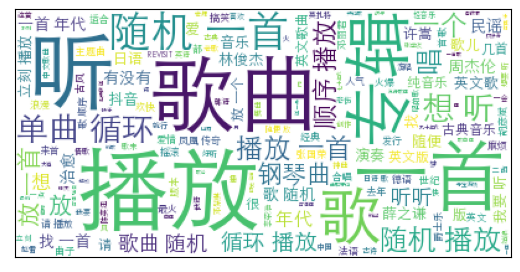

In [9]:
content = ''.join(train_data[train_data[1] == 'Music-Play'][0])
words = jieba.lcut(content)

# 读取中文停用词
cn_stopwords = ' '.join(pd.read_csv('https://mirror.coggle.club/stopwords/baidu_stopwords.txt', header=None)[0])
words = [x for x in words if x not in cn_stopwords]
print(words)
# 中文字体，wget https://mirror.coggle.club/STHeiti-Light.ttc
# 如果不设置，云图不能展示中文
wordcloud = WordCloud(background_color = 'white', max_words = 1000, font_path = 'STHeiti-Light.ttc')
wordcloud.generate(' '.join(words))
plt.imshow(wordcloud)
plt.xticks([]); plt.yticks([])